In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random as rd
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot
from datetime import datetime, timedelta
import numpy
import datetime

# 괴물쥐_935176016

### 채팅 데이터 불러오기

In [2]:
chat = pd.read_csv("chat data/game/935176016.csv", names=['시간','시청자ID','채팅내용'])
chat

,시간,시청자ID,채팅내용
0,0:00:14,변스코,ㅎㅇ
1,0:00:16,jms1205,ㅎㅇㅎㅇ
2,0:00:17,변스코,지각 안햇네
3,0:00:20,아니키라불러,어셈블
4,0:00:26,누구일까나,ㅡ
...,...,...,...
58948,8:03:22,뽀송세연,HeyGuys HeyGuys HeyGuys HeyGuys
58949,8:03:22,포테이토더블치즈엣지,BibleThump BibleThump BibleThump BibleThump Bi...
58950,8:03:23,나태24,HeyGuys
58951,8:03:23,석박이_,BibleThump


### 채팅 데이터 노이즈(채팅봇, 아스키아트) 제거

In [3]:
chat_dot = chat.채팅내용.str.contains('[⠁⠃⠉⠙⠑⠋⠛⠓⠊⠚⠅⠇⠍⠝⠕⠏⠟⠗⠎⠞⠥⠧⠺⠭⠽⠵⠠⠁⠃⠉⠙⠑⠋⠛⠓⠊⠚]',na=False) 
chat = chat[~chat_dot]
chat = chat[chat['시청자ID'] != "Nightbot"]
chat = chat[chat['시청자ID'] != "싹둑"]
chat

,시간,시청자ID,채팅내용
0,0:00:14,변스코,ㅎㅇ
1,0:00:16,jms1205,ㅎㅇㅎㅇ
2,0:00:17,변스코,지각 안햇네
3,0:00:20,아니키라불러,어셈블
4,0:00:26,누구일까나,ㅡ
...,...,...,...
58948,8:03:22,뽀송세연,HeyGuys HeyGuys HeyGuys HeyGuys
58949,8:03:22,포테이토더블치즈엣지,BibleThump BibleThump BibleThump BibleThump Bi...
58950,8:03:23,나태24,HeyGuys
58951,8:03:23,석박이_,BibleThump


In [4]:
chat_number = chat.groupby('시간')['채팅내용'].count()
chat_number

시간
0:00:14     1
0:00:16     1
0:00:17     1
0:00:20     1
0:00:26     1
           ..
8:03:19     5
8:03:20     4
8:03:21    10
8:03:22    11
8:03:23     3
Name: 채팅내용, Length: 21534, dtype: int64

In [5]:
df1 = DataFrame(chat_number)
df1 = df1.reset_index()
df1.rename(columns= {'채팅내용':'채팅수'}, inplace=True)
df1

,시간,채팅수
0,0:00:14,1
1,0:00:16,1
2,0:00:17,1
3,0:00:20,1
4,0:00:26,1
...,...,...
21529,8:03:19,5
21530,8:03:20,4
21531,8:03:21,10
21532,8:03:22,11


In [6]:
df1['시간'] = pd.to_datetime(df1['시간'])
df1 = df1.set_index('시간')
date_index = pd.date_range('00:00:00', '08:03:23', freq='s')
df1 = df1.reindex(date_index, fill_value=0)

In [7]:
df1 = df1.reset_index()
df1.rename(columns= {'index':'시간'}, inplace=True)
df1['시간'] = df1['시간'].dt.strftime('%H:%M:%S')
df1

,시간,채팅수
0,00:00:00,0
1,00:00:01,0
2,00:00:02,0
3,00:00:03,0
4,00:00:04,0
...,...,...
28999,08:03:19,5
29000,08:03:20,4
29001,08:03:21,10
29002,08:03:22,11


Text(0, 0.5, 'chat counts')

C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54021 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jaegun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from

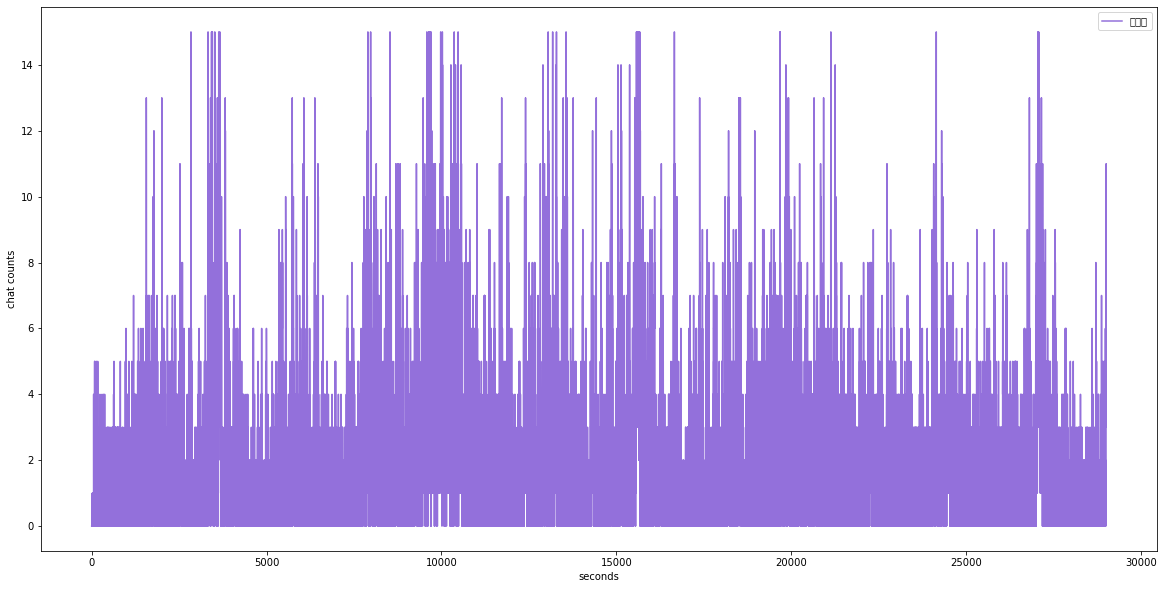

In [8]:
df1.plot(kind='line', figsize=(20,10), color='mediumpurple')
plt.xlabel("seconds")
plt.ylabel("chat counts")
#plt.savefig('./935176016.png')

## 채팅 트래픽 기반 하이라이트 추출

### 하이라이트 알고리즘 parameter 설정

In [9]:
chat.count()

시간       58779
시청자ID    58779
채팅내용     58777
dtype: int64

In [10]:
a = np.percentile(df1['채팅수'], 99) 
a

11.0

In [11]:
b = df1['채팅수'].mean()
b

2.0265135843331956

In [12]:
c = np.std(df1['채팅수'])
c

2.2535052994827187

In [13]:
t = (a - b) / c
t

3.982012564038179

In [14]:
df1['채팅수']

0         0
1         0
2         0
3         0
4         0
         ..
28999     5
29000     4
29001    10
29002    11
29003     3
Name: 채팅수, Length: 29004, dtype: int64

### 하이라이트 선정 알고리즘

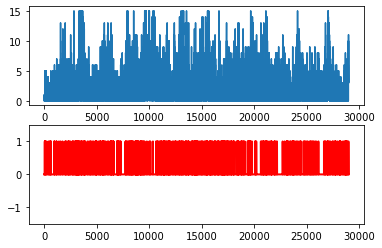

In [15]:
import numpy as np
import pylab


def init(x, lag, threshold, influence):

    labels = np.zeros(lag) 
    filtered_y = np.array(x[0:lag]) 
    avg_filter = np.zeros(lag)
    std_filter = np.zeros(lag)
    var_filter = np.zeros(lag)

    avg_filter[lag - 1] = np.mean(x[0:lag])
    std_filter[lag - 1] = np.std(x[0:lag])
    var_filter[lag - 1] = np.var(x[0:lag])

    return dict(avg=avg_filter[lag - 1],
                var=var_filter[lag - 1],
                std=std_filter[lag - 1],
                filtered_y=filtered_y,
                labels=labels)

def add(esult, single_value, lag, threshold, influence):
    previous_avg = result['avg']
    previous_var = result['var']
    previous_std = result['std']
    filtered_y = result['filtered_y']
    labels = result['labels']

    if abs(single_value - previous_avg) > threshold * previous_std:
        if single_value > previous_avg:
            labels = np.append(labels, 1)
        else:
            labels = np.append(labels, -1)

        filtered_y = np.append(filtered_y, influence * single_value
                               + (1 - influence) * filtered_y[-1])
    else:
        labels = np.append(labels, 0)
        filtered_y = np.append(filtered_y, single_value)

    current_avg_filter = previous_avg + 1. / lag * (filtered_y[-1]
            - filtered_y[len(filtered_y) - lag - 1])

    current_var_filter = previous_var + 1. / lag * ((filtered_y[-1]
            - previous_avg) ** 2 - (filtered_y[len(filtered_y) - 1
            - lag] - previous_avg) ** 2 - (filtered_y[-1]
            - filtered_y[len(filtered_y) - 1 - lag]) ** 2 / lag)  
    
    current_std_filter = np.sqrt(current_var_filter)

    return dict(avg=current_avg_filter,
                var=current_var_filter,
                std=current_std_filter,
                filtered_y=filtered_y[1:],
                labels=labels)

lag = 25
threshold = t
influence = 0

y = df1['채팅수']

result = init(y[:lag], lag=lag, threshold=threshold, influence=influence)

for i in y[lag:]:
    result = add(result, i, lag, threshold, influence)

pylab.subplot(211)
pylab.plot(np.arange(1, len(y) + 1), y)
pylab.subplot(212)
pylab.step(np.arange(1, len(y) + 1), result['labels'], color='red',
           lw=2)
pylab.ylim(-1.5, 1.5)
pylab.show()

In [16]:
highlight_result = result['labels']
highlight_result

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
column_highlight = ['하이라이트 여부']
df2 = pd.DataFrame(highlight_result, columns=column_highlight)
df2 = df2.replace(0.0, "X")
df2 = df2.replace(1.0, "O")
df2

,하이라이트 여부
0,X
1,X
2,X
3,X
4,X
...,...
28999,X
29000,X
29001,X
29002,X


In [18]:
chat_highlightall = pd.concat([df1, df2], axis=1)
chat_highlightall

,시간,채팅수,하이라이트 여부
0,00:00:00,0,X
1,00:00:01,0,X
2,00:00:02,0,X
3,00:00:03,0,X
4,00:00:04,0,X
...,...,...,...
28999,08:03:19,5,X
29000,08:03:20,4,X
29001,08:03:21,10,X
29002,08:03:22,11,X


In [19]:
chat_highlight = chat_highlightall[chat_highlightall['하이라이트 여부'] == "O"]
chat_highlight

,시간,채팅수,하이라이트 여부
56,00:00:56,4,O
60,00:01:00,3,O
62,00:01:02,2,O
66,00:01:06,2,O
70,00:01:10,2,O
...,...,...,...
28726,07:58:46,5,O
28770,07:59:30,4,O
28847,08:00:47,4,O
28869,08:01:09,7,O


In [20]:
# csv로 변환 후 비교해보기

#chat_highlight.to_csv("[Chat Highlight]괴물쥐_935176016.csv")

In [21]:
chat_highlight['시간']

56       00:00:56
60       00:01:00
62       00:01:02
66       00:01:06
70       00:01:10
           ...   
28726    07:58:46
28770    07:59:30
28847    08:00:47
28869    08:01:09
28993    08:03:13
Name: 시간, Length: 694, dtype: object

In [22]:
ch_time = pd.to_datetime(chat_highlight['시간'])

In [23]:
ch_time_plus1 = ch_time + timedelta(seconds=1)
ch_time_plus2 = ch_time + timedelta(seconds=2)
ch_time_minus1 = ch_time - timedelta(seconds=1)
ch_time_minus2 = ch_time - timedelta(seconds=2)

In [24]:
pd.DataFrame(ch_time)

,시간
56,2021-04-28 00:00:56
60,2021-04-28 00:01:00
62,2021-04-28 00:01:02
66,2021-04-28 00:01:06
70,2021-04-28 00:01:10
...,...
28726,2021-04-28 07:58:46
28770,2021-04-28 07:59:30
28847,2021-04-28 08:00:47
28869,2021-04-28 08:01:09


In [25]:
pd.DataFrame(ch_time_plus1)

,시간
56,2021-04-28 00:00:57
60,2021-04-28 00:01:01
62,2021-04-28 00:01:03
66,2021-04-28 00:01:07
70,2021-04-28 00:01:11
...,...
28726,2021-04-28 07:58:47
28770,2021-04-28 07:59:31
28847,2021-04-28 08:00:48
28869,2021-04-28 08:01:10


In [26]:
pd.DataFrame(ch_time_plus2)

,시간
56,2021-04-28 00:00:58
60,2021-04-28 00:01:02
62,2021-04-28 00:01:04
66,2021-04-28 00:01:08
70,2021-04-28 00:01:12
...,...
28726,2021-04-28 07:58:48
28770,2021-04-28 07:59:32
28847,2021-04-28 08:00:49
28869,2021-04-28 08:01:11


In [27]:
pd.DataFrame(ch_time_minus1)

,시간
56,2021-04-28 00:00:55
60,2021-04-28 00:00:59
62,2021-04-28 00:01:01
66,2021-04-28 00:01:05
70,2021-04-28 00:01:09
...,...
28726,2021-04-28 07:58:45
28770,2021-04-28 07:59:29
28847,2021-04-28 08:00:46
28869,2021-04-28 08:01:08


In [28]:
pd.DataFrame(ch_time_minus2)

,시간
56,2021-04-28 00:00:54
60,2021-04-28 00:00:58
62,2021-04-28 00:01:00
66,2021-04-28 00:01:04
70,2021-04-28 00:01:08
...,...
28726,2021-04-28 07:58:44
28770,2021-04-28 07:59:28
28847,2021-04-28 08:00:45
28869,2021-04-28 08:01:07


In [29]:
ch_time_plus = pd.merge(ch_time_plus1, ch_time_plus2, how='outer')
ch_time_minus = pd.merge(ch_time_minus1, ch_time_minus2, how='outer')
ch_time_plusminus = pd.merge(ch_time_plus, ch_time_minus, how='outer')
ch_time_final = pd.merge(ch_time, ch_time_plusminus, how='outer')
ch_time_final

,시간
0,2021-04-28 00:00:56
1,2021-04-28 00:01:00
2,2021-04-28 00:01:02
3,2021-04-28 00:01:06
4,2021-04-28 00:01:10
...,...
2274,2021-04-28 07:58:44
2275,2021-04-28 07:59:28
2276,2021-04-28 08:00:45
2277,2021-04-28 08:01:07


In [30]:
ch_time_final['시간'] = ch_time_final['시간'].dt.strftime('%H:%M:%S')
ch_time_final['시간'] = sorted(ch_time_final['시간'])
ch_time_final

,시간
0,00:00:54
1,00:00:55
2,00:00:56
3,00:00:57
4,00:00:58
...,...
2274,08:03:11
2275,08:03:12
2276,08:03:13
2277,08:03:14


In [31]:
audio_highlight = pd.read_csv('audio highlight data/[Audio Highlight]괴물쥐_935176016.csv', names=['시간', '하이라이트 여부'], encoding='CP949')
audio_highlight

,시간,하이라이트 여부
164,0:02:44,O
166,0:02:46,O
723,0:12:03,O
804,0:13:24,O
819,0:13:39,O
...,...,...
28304,7:51:44,O
28616,7:56:56,O
28709,7:58:29,O
28717,7:58:37,O


In [32]:
audio_highlight['시간']

164      0:02:44
166      0:02:46
723      0:12:03
804      0:13:24
819      0:13:39
          ...   
28304    7:51:44
28616    7:56:56
28709    7:58:29
28717    7:58:37
28855    8:00:55
Name: 시간, Length: 396, dtype: object

In [33]:
ah_time = pd.to_datetime(audio_highlight['시간'])

In [34]:
ah_time_plus1 = ah_time + timedelta(seconds=1)
ah_time_plus2 = ah_time + timedelta(seconds=2)
ah_time_minus1 = ah_time - timedelta(seconds=1)
ah_time_minus2 = ah_time - timedelta(seconds=2)

In [35]:
pd.DataFrame(ah_time)

,시간
164,2021-04-28 00:02:44
166,2021-04-28 00:02:46
723,2021-04-28 00:12:03
804,2021-04-28 00:13:24
819,2021-04-28 00:13:39
...,...
28304,2021-04-28 07:51:44
28616,2021-04-28 07:56:56
28709,2021-04-28 07:58:29
28717,2021-04-28 07:58:37


In [36]:
pd.DataFrame(ah_time_plus1)

,시간
164,2021-04-28 00:02:45
166,2021-04-28 00:02:47
723,2021-04-28 00:12:04
804,2021-04-28 00:13:25
819,2021-04-28 00:13:40
...,...
28304,2021-04-28 07:51:45
28616,2021-04-28 07:56:57
28709,2021-04-28 07:58:30
28717,2021-04-28 07:58:38


In [37]:
pd.DataFrame(ah_time_plus2)

,시간
164,2021-04-28 00:02:46
166,2021-04-28 00:02:48
723,2021-04-28 00:12:05
804,2021-04-28 00:13:26
819,2021-04-28 00:13:41
...,...
28304,2021-04-28 07:51:46
28616,2021-04-28 07:56:58
28709,2021-04-28 07:58:31
28717,2021-04-28 07:58:39


In [38]:
pd.DataFrame(ah_time_minus1)

,시간
164,2021-04-28 00:02:43
166,2021-04-28 00:02:45
723,2021-04-28 00:12:02
804,2021-04-28 00:13:23
819,2021-04-28 00:13:38
...,...
28304,2021-04-28 07:51:43
28616,2021-04-28 07:56:55
28709,2021-04-28 07:58:28
28717,2021-04-28 07:58:36


In [39]:
pd.DataFrame(ah_time_minus2)

,시간
164,2021-04-28 00:02:42
166,2021-04-28 00:02:44
723,2021-04-28 00:12:01
804,2021-04-28 00:13:22
819,2021-04-28 00:13:37
...,...
28304,2021-04-28 07:51:42
28616,2021-04-28 07:56:54
28709,2021-04-28 07:58:27
28717,2021-04-28 07:58:35


In [40]:
ah_time_plus = pd.merge(ah_time_plus1, ah_time_plus2, how='outer')
ah_time_minus = pd.merge(ah_time_minus1, ah_time_minus2, how='outer')
ah_time_plusminus = pd.merge(ah_time_plus, ah_time_minus, how='outer')
ah_time_final = pd.merge(ah_time, ah_time_plusminus, how='outer')
ah_time_final

,시간
0,2021-04-28 00:02:44
1,2021-04-28 00:02:46
2,2021-04-28 00:12:03
3,2021-04-28 00:13:24
4,2021-04-28 00:13:39
...,...
1903,2021-04-28 07:51:42
1904,2021-04-28 07:56:54
1905,2021-04-28 07:58:27
1906,2021-04-28 07:58:35


In [41]:
ah_time_final['시간'] = ah_time_final['시간'].dt.strftime('%H:%M:%S')
ah_time_final['시간'] = sorted(ah_time_final['시간'])
ah_time_final

,시간
0,00:02:42
1,00:02:43
2,00:02:44
3,00:02:45
4,00:02:46
...,...
1903,08:00:53
1904,08:00:54
1905,08:00:55
1906,08:00:56


In [42]:
h_time_final = pd.merge(ch_time_final, ah_time_final, how='outer')
h_time_final['시간'] = sorted(h_time_final['시간'])
h_time_final['하이라이트 여부'] = 'O'
h_time_final

,시간,하이라이트 여부
0,00:00:54,O
1,00:00:55,O
2,00:00:56,O
3,00:00:57,O
4,00:00:58,O
...,...,...
3979,08:03:11,O
3980,08:03:12,O
3981,08:03:13,O
3982,08:03:14,O


In [43]:
chat['시간'] = pd.to_datetime(chat['시간'])
chat['시간'] = chat['시간'].dt.strftime('%H:%M:%S')
chat

,시간,시청자ID,채팅내용
0,00:00:14,변스코,ㅎㅇ
1,00:00:16,jms1205,ㅎㅇㅎㅇ
2,00:00:17,변스코,지각 안햇네
3,00:00:20,아니키라불러,어셈블
4,00:00:26,누구일까나,ㅡ
...,...,...,...
58948,08:03:22,뽀송세연,HeyGuys HeyGuys HeyGuys HeyGuys
58949,08:03:22,포테이토더블치즈엣지,BibleThump BibleThump BibleThump BibleThump Bi...
58950,08:03:23,나태24,HeyGuys
58951,08:03:23,석박이_,BibleThump


In [44]:
final_highlight = pd.merge(chat, h_time_final, on='시간', how='left')
final_highlight['하이라이트 여부'] = final_highlight['하이라이트 여부'].fillna('X')
final_highlight

,시간,시청자ID,채팅내용,하이라이트 여부
0,00:00:14,변스코,ㅎㅇ,X
1,00:00:16,jms1205,ㅎㅇㅎㅇ,X
2,00:00:17,변스코,지각 안햇네,X
3,00:00:20,아니키라불러,어셈블,X
4,00:00:26,누구일까나,ㅡ,X
...,...,...,...,...
58774,08:03:22,뽀송세연,HeyGuys HeyGuys HeyGuys HeyGuys,X
58775,08:03:22,포테이토더블치즈엣지,BibleThump BibleThump BibleThump BibleThump Bi...,X
58776,08:03:23,나태24,HeyGuys,X
58777,08:03:23,석박이_,BibleThump,X


In [45]:
final_highlight.to_csv("[Final Highlight]괴물쥐_935176016.csv", encoding='UTF-8')